In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statistics import mean

In [3]:
train, test = (pd.read_csv(f"../data/{text}.csv") for text in ("train", "test"))

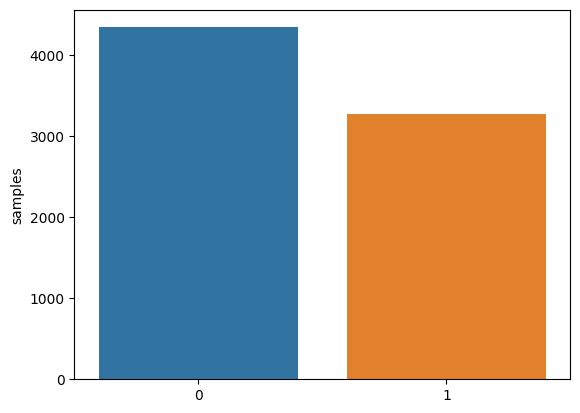

In [4]:
x = train.target.value_counts()
sns.barplot(x=x.index, y=x)
plt.gca().set_ylabel("samples")
plt.show()

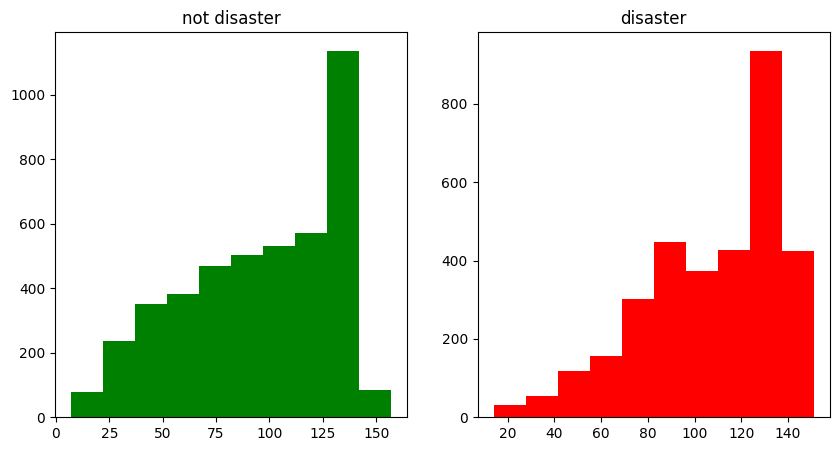

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

tweet_len = train.loc[train.target == 0, "text"].str.len()
ax1.hist(tweet_len, color="green")
ax1.set_title("not disaster")

tweet_len = train.loc[train.target == 1, "text"].str.len()
ax2.hist(tweet_len, color="red")
ax2.set_title("disaster")

plt.show()

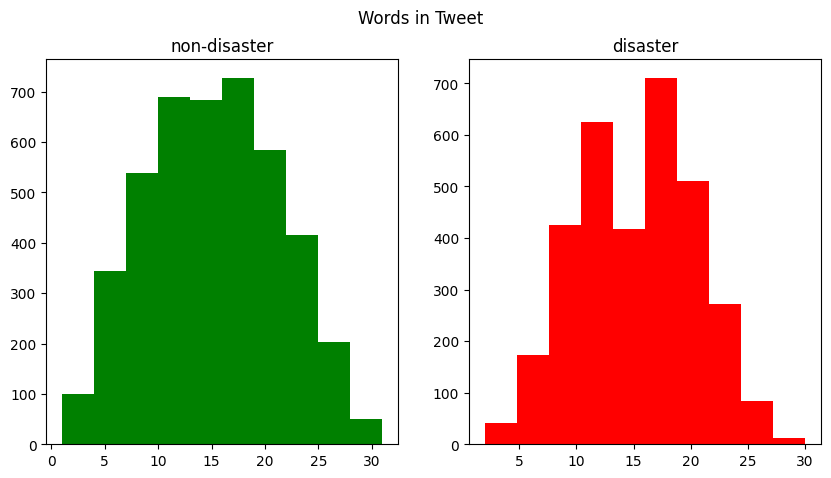

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

now = train.loc[train.target == 0, "text"].str.split().apply(len)
ax1.hist(x=now, color="green")
ax1.set_title("non-disaster")

now = train.loc[train.target == 1, "text"].str.split().apply(len)
ax2.hist(x=now, color="red")
ax2.set_title("disaster")

fig.suptitle("Words in Tweet")
plt.show()

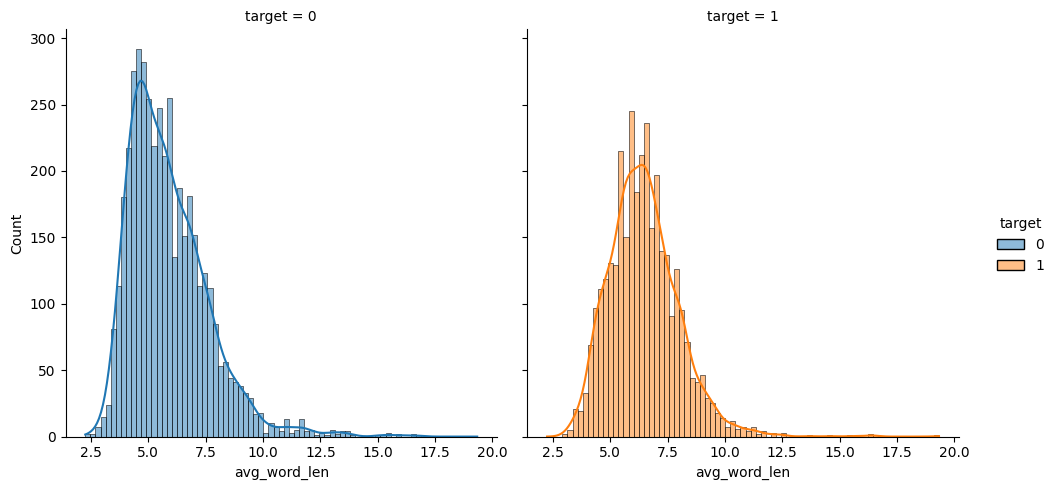

In [7]:
train["avg_word_len"] = train["text"].str.split().apply(lambda list_of_words: mean([len(word) for word in list_of_words]))
sns.displot(data=train, x="avg_word_len", kind="hist", kde=True, col="target", hue="target")
plt.show()

In [8]:
def create_corpus(target):
    corpus = []

    filtered_tweets = train.loc[train.target == target, "text"].str.split()
    for x in filtered_tweets:
        for i in x:
            corpus.append(i)
    
    return corpus

In [9]:
corpus = create_corpus(target=0)

In [10]:
import nltk
from nltk.corpus import stopwords

stop=set(stopwords.words('english'))

In [11]:
from collections import defaultdict
dic = defaultdict(int)

In [12]:
for word in corpus:
    if word in stop:
        dic[word]+=1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]

In [13]:
x, y = zip(*top)

<BarContainer object of 10 artists>

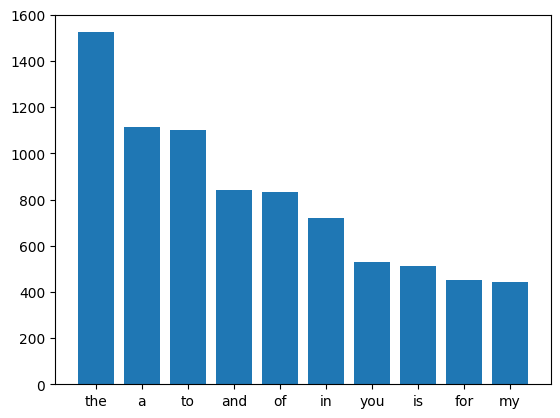

In [14]:
plt.bar(x, y)

In [15]:
corpus = create_corpus(target=1)

dic = defaultdict(int)

for x in corpus:
    if x in stop:
        dic[x] += 1

top = sorted(dic.items(), key = lambda x: x[1], reverse=True)[:10]

<BarContainer object of 10 artists>

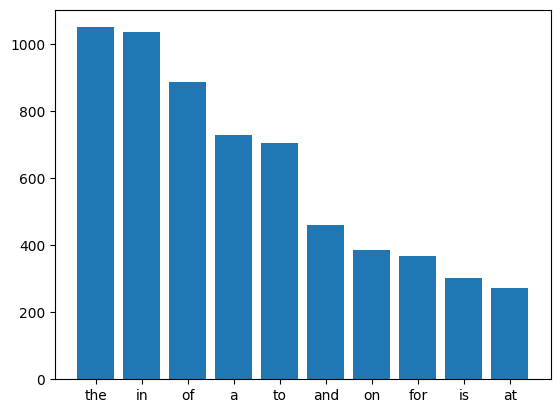

In [16]:
x, y = zip(*top)
plt.bar(x,y)

In [17]:
from string import punctuation

<BarContainer object of 20 artists>

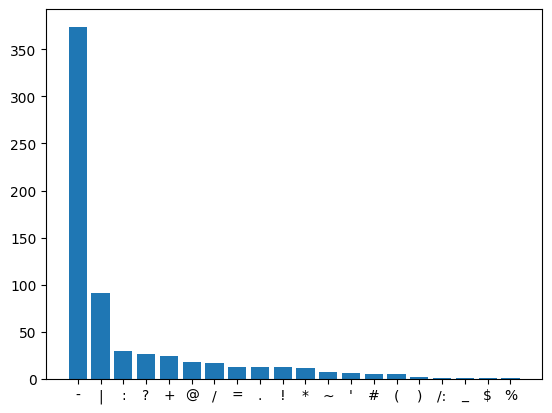

In [18]:
special = punctuation

corpus = create_corpus(0)

dic = defaultdict(int)

for word in corpus:
    if word in special:
        dic[word] += 1

x, y = zip(*sorted(dic.items(), key=lambda x: x[1], reverse=True))
plt.bar(x, y)

<BarContainer object of 18 artists>

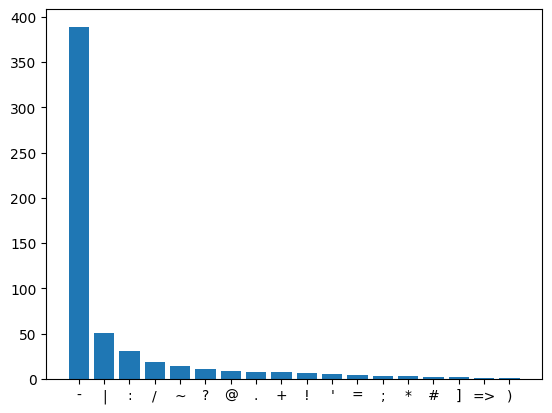

In [19]:
special = punctuation

corpus = create_corpus(1)

dic = defaultdict(int)

for word in corpus:
    if word in special:
        dic[word] += 1

x, y = zip(*sorted(dic.items(), key=lambda x: x[1], reverse=True))
plt.bar(x, y)

In [20]:
from collections import  Counter
counter = Counter(corpus)
most = counter.most_common()
x = []
y = []
for word, count in most[:40]:
    if word not in stop:
        x.append(word)
        y.append(count)

<AxesSubplot: >

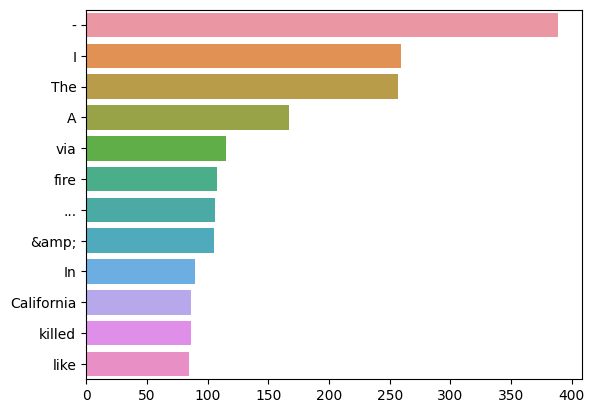

In [21]:
sns.barplot(x=y, y=x)

In [22]:
from http.client import CannotSendRequest
from sklearn.feature_extraction.text import CountVectorizer
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

    return words_freq[:n]

<AxesSubplot: >

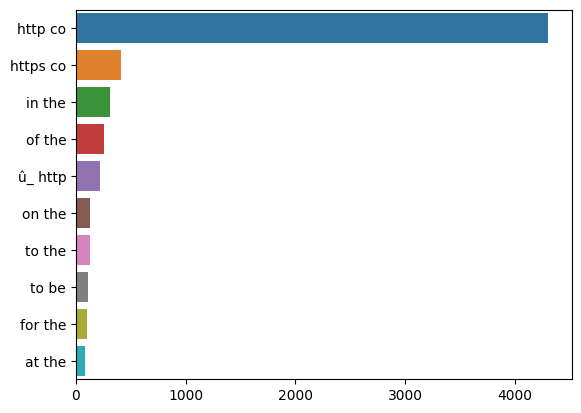

In [23]:
# plt.figure(figsize=(10, 5))
top_tweet_bigrams = get_top_tweet_bigrams(train["text"])[:10]
top_tweet_bigrams
x, y = map(list, zip(*top_tweet_bigrams))
sns.barplot(x=y, y=x)

In [69]:
df = pd.concat([train, test]).reset_index()

In [74]:
import re 

def remove_url(text: str)->str:
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r'', text)

def remove_html(text: str)->str:
    html = re.compile(r'<.*?>')
    
    return html.sub(r'', text)
df.text = df.text.apply(remove_html)
df.text = df.text.apply(remove_url)


In [75]:
df.text

0        Our Deeds are the Reason of this #earthquake M...
1                   Forest fire near La Ronge Sask. Canada
2        All residents asked to 'shelter in place' are ...
3        13,000 people receive #wildfires evacuation or...
4        Just got sent this photo from Ruby #Alaska as ...
                               ...                        
10871    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10872    Storm in RI worse than last hurricane. My city...
10873                    Green Line derailment in Chicago 
10874          MEG issues Hazardous Weather Outlook (HWO) 
10875    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 10876, dtype: object

In [109]:
import numpy as np
i = np.random.randint(0, len(df))
text = df.loc[i, "text"]
print(text)

The move Saturday --&gt; #Mirage! 400 N. West st. Raleigh NC 21+  Tickets at: 


In [114]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

df.text = df.text.apply(remove_emoji)

In [133]:
def remove_punct(text: str)->str:
    table = str.maketrans('', '', punctuation)
    return text.translate(table)

df.text = df.text.apply(remove_punct)

In [148]:
from spellchecker import SpellChecker

spell = SpellChecker()

def correct_spelling(text: str)->str:
    corrected_text = []
    # misspelled_words = spell.unknown(text.split())

    for word in text.split():
        corrected_word = spell.correction(word)
        if corrected_word is not None:
            corrected_text.append(corrected_word)
        else:
            corrected_text.append(word)

    return " ".join(corrected_text)

text = "corect me pleasee"
    
correct_spelling(text)

df.text = df.text.apply(correct_spelling)

In [ ]:
text = "corect me pleasee"
    
correct_spelling(text)

In [147]:
for text in df.text:
    if type(text) != str:
        print(type(text))

In [141]:
text = "idem u shopping"
text.split()

['idem', 'u', 'shopping']

In [142]:
spell.unknown(text.split())

{'idem'}

In [143]:
spell.correction("hating")

'hating'